<a href="https://colab.research.google.com/github/Alimv81/Google-play-score-prediction/blob/main/googleplayscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Datasets/googleplaystore.csv')

In [ ]:
def test_model(name, algo, **kwargs):
    global X_train, X_test, y_train, y_test

    model = algo(**kwargs)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    print(name)
    print(model.score(X_test, y_test))
    print(mean_squared_error(y_test, predictions))
    print(np.mean(y_test), np.mean(predictions))
    print()

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df = df[df['Rating'].notna()]

In [ ]:
df = df[df['Content Rating'] != 'Unrated']

In [ ]:
df = df[df['Type'] != '0']

In [ ]:
def func(x):
  if x != '0':
    x = x[1:]
  return float(x)

df['Price'] = df['Price'].apply(lambda x: func(x))

In [ ]:
df['Reviews'] = df['Reviews'].apply(lambda x: int(x))

In [ ]:
def func(x):
  x = x.replace(',', '').replace('+', '')
  return int(x)

df['Installs'] = df['Installs'].apply(lambda x: func(x))

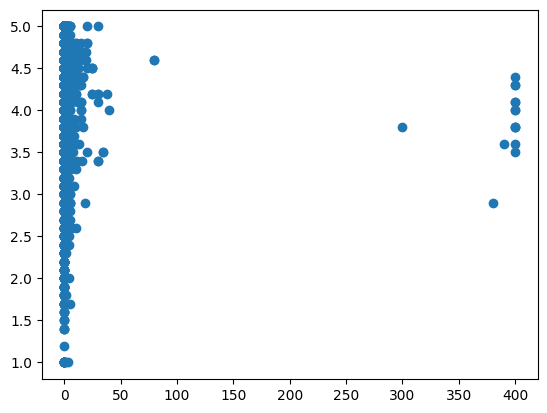

In [ ]:
plt.plot(df['Price'], df['Rating'], 'o')
plt.show()

[1.9447169e-09] 4.129211070981366


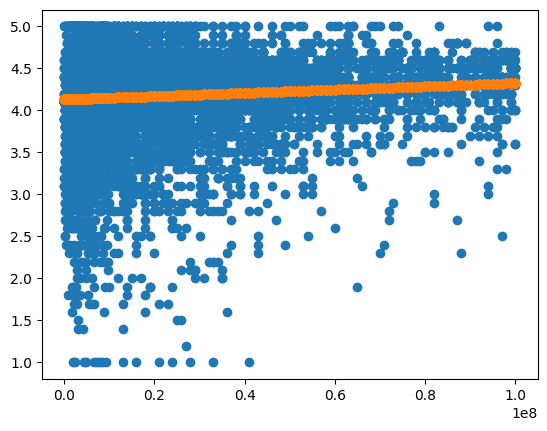

In [ ]:
m = {'M': 10**6, 'k': 10**3}
def func(x):
  return m[x[-1]] * float(x[:-1])

X = df[df['Size']!='Varies with device']['Size'].apply(lambda x: func(x)).to_numpy().reshape(-1, 1)
y = df[df['Size']!='Varies with device']['Rating']

model = LinearRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)
pred = model.predict(X)

plt.plot(X, y, 'o')
plt.plot(X, pred, 'o')
plt.show()

[1.11659669e-08] 4.186026743437722


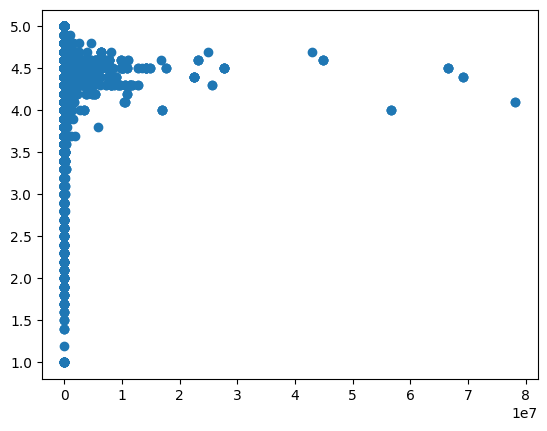

In [ ]:
X = df['Reviews'].to_numpy().reshape(-1, 1)
y = df['Rating']

model = LinearRegression()
model.fit(X, y)

print(model.coef_, model.intercept_)
pred = model.predict(X)

plt.plot(X, y, 'o')
# plt.plot(X, pred, 'o')
plt.show()

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9365 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9365 non-null   object 
 1   Category        9365 non-null   object 
 2   Rating          9365 non-null   float64
 3   Reviews         9365 non-null   int64  
 4   Size            9365 non-null   object 
 5   Installs        9365 non-null   int64  
 6   Type            9365 non-null   object 
 7   Price           9365 non-null   float64
 8   Content Rating  9365 non-null   object 
 9   Genres          9365 non-null   object 
 10  Last Updated    9365 non-null   object 
 11  Current Ver     9361 non-null   object 
 12  Android Ver     9363 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.0+ MB


In [ ]:
X_numerical = df[['Installs', 'Reviews', 'Price']]
X_categorical = df[['Category', 'Type', 'Content Rating']]
y = df['Rating']

In [ ]:
X_categorical = pd.get_dummies(X_categorical)
X_categorical.head()

,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,...,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
X = pd.concat([X_numerical, X_categorical], axis=1)
X.head()

,Installs,Reviews,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,...,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,10000,159,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,500000,967,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,5000000,87510,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,50000000,215644,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,100000,967,0.0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [ ]:
test_model('linear rgression', LinearRegression)
test_model('gradient boosting', GradientBoostingRegressor)
test_model('sklearn nn model', MLPRegressor, hidden_layer_sizes=[200, 200],)

linear rgression
0.026376094366420966
0.2594770546298699
4.183769353977576 4.193761228364218

gradient boosting
0.13920881781203687
0.22940640560807649
4.183769353977576 4.192698096290996

sklearn nn model
-3592701646.8433747
957478176.4829829
4.183769353977576 5255.544796993141

